# Problem statement
1) Prepare a classification model using Naive Bayes 
for salary data 

### Data Description:

- age -- age of a person
- workclass	-- A work class is a grouping of work 
- education	-- Education of an individuals	
- maritalstatus -- Marital status of an individulas	
- occupation	 -- occupation of an individuals
- relationship -- 	
- race --  Race of an Individual
- sex --  Gender of an Individual
- capitalgain --  profit received from the sale of an investment	
- capitalloss	-- A decrease in the value of a capital asset
- hoursperweek -- number of hours work per week	
- native -- Native of an individual
- Salary -- salary of an individual

In [1]:
#import necessay libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter('ignore')

In [2]:
train='https://raw.githubusercontent.com/AliHumadi2000/Naive-bayes_assignment-/main/SalaryData_Train.csv'
test='https://raw.githubusercontent.com/AliHumadi2000/Naive-bayes_assignment-/main/SalaryData_Test.csv'
df_train=pd.read_csv(train)
df_test=pd.read_csv(test)

# Data Understanding and exploring

In [3]:
#see the first 10 columns 
df_train.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
#Data shape 
[r,c]=df_train.shape
print("Train-rows number: ",r)
print("Train-columns number: ",c)
[r,c]=df_test.shape
print("Test-rows number: ",r)
print("Test-columns number: ",c)

Train-rows number:  30161
Train-columns number:  14
Test-rows number:  15060
Test-columns number:  14


In [5]:
# data type 
df_train.dtypes
#we can observe that our data has mix data type numerical and catagorical 

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [6]:
#convert object to catagory
cat= df_train.select_dtypes(include="object")
cat.columns 
for i in cat.columns:
    df_train[i]=df_train[i].astype('category')
cat1= df_test.select_dtypes(include="object")
cat1.columns 
for i in cat1.columns:
    df_test[i]=df_test[i].astype('category')

In [7]:
df_train.dtypes,df_test.dtypes

(age                 int64
 workclass        category
 education        category
 educationno         int64
 maritalstatus    category
 occupation       category
 relationship     category
 race             category
 sex              category
 capitalgain         int64
 capitalloss         int64
 hoursperweek        int64
 native           category
 Salary           category
 dtype: object,
 age                 int64
 workclass        category
 education        category
 educationno         int64
 maritalstatus    category
 occupation       category
 relationship     category
 race             category
 sex              category
 capitalgain         int64
 capitalloss         int64
 hoursperweek        int64
 native           category
 Salary           category
 dtype: object)

In [8]:
#basic statastics 
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,30161.0,38.438115,13.134830,17.0,28.0,37.0,47.0,90.0
educationno,30161.0,10.121316,2.550037,1.0,9.0,10.0,13.0,16.0
capitalgain,30161.0,1092.044064,7406.466611,0.0,0.0,0.0,0.0,99999.0
capitalloss,30161.0,88.302311,404.121321,0.0,0.0,0.0,0.0,4356.0
hoursperweek,30161.0,40.931269,11.980182,1.0,40.0,40.0,45.0,99.0


In [9]:
#check if there is any missing our duplicated value 
df_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
df_train.duplicated().sum()# there is 3258 duplicated values 
# there is 3258 duplicated values 

3258

In [11]:
# Remove duplicated values from ther given dataset
df_train.drop_duplicates(inplace = True)

In [12]:
df_train.shape

(26903, 14)

In [13]:
#convert catagory data type to numeric  using label_encoder
label_encoder=preprocessing.LabelEncoder()
#for train dataset
t=df_train.select_dtypes(include='category')
#for test dataset
ts=df_test.select_dtypes(include='category')
for i in t.columns:
    df_train[i]=label_encoder.fit_transform(df_train[i])
for i in ts.columns:
    df_test[i]=label_encoder.fit_transform(df_test[i])

In [14]:
df_train.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [15]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


# Check from the outliers for numeric value  

In [16]:
out = df_train.select_dtypes(include="int64")
out

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
30154,53,14,0,0,40
30155,22,10,0,0,40
30156,27,12,0,0,38
30158,58,9,0,0,40


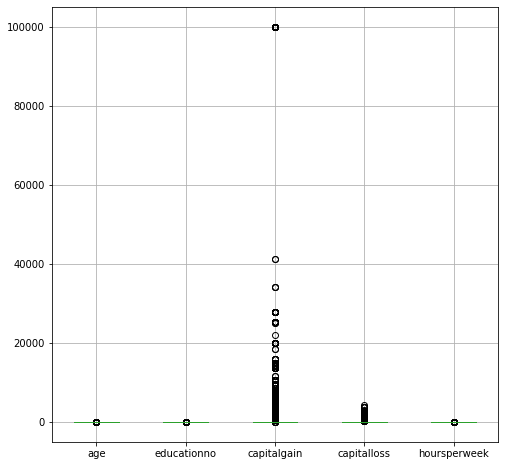

In [17]:
plt.figure(figsize=(8,8))
out.boxplot()
plt.show()

In [18]:
#as we can observe thee is more outliers in capitalgain
#first lets try to normalize it 
from sklearn.preprocessing import Normalizer
cap=Normalizer()
x=cap.fit_transform(out)
x

array([[1.79330418e-02, 5.97768061e-03, 9.99652127e-01, 0.00000000e+00,
        1.83928634e-02],
       [9.38563820e-01, 2.44026593e-01, 0.00000000e+00, 0.00000000e+00,
        2.44026593e-01],
       [6.79764665e-01, 1.60996894e-01, 0.00000000e+00, 0.00000000e+00,
        7.15541753e-01],
       ...,
       [5.60919770e-01, 2.49297676e-01, 0.00000000e+00, 0.00000000e+00,
        7.89442639e-01],
       [8.16577498e-01, 1.26710301e-01, 0.00000000e+00, 0.00000000e+00,
        5.63156895e-01],
       [3.46109524e-03, 5.99035715e-04, 9.99990287e-01, 0.00000000e+00,
        2.66238096e-03]])

<AxesSubplot:>

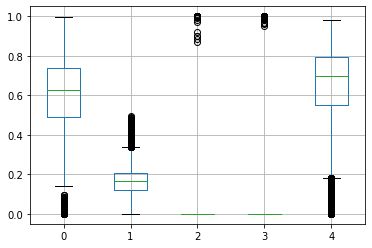

In [19]:
data=pd.DataFrame(x)
data.boxplot()

In [20]:
#uisng IQR
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(df_train, "capitalgain")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)


Upper whisker:  0.0
Lower Whisker:  0.0


In [21]:
df_train[(df_train['capitalgain'] < lower) | (df_train['capitalgain'] > upper)]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
8,31,2,12,14,4,9,1,4,0,14084,0,50,37,1
9,42,2,9,13,2,3,0,4,1,5178,0,40,37,1
55,30,2,11,9,2,6,0,4,1,5013,0,40,37,0
56,30,2,9,13,2,11,0,4,1,2407,0,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30121,66,0,0,6,2,2,0,4,1,3471,0,40,37,0
30124,57,1,11,9,2,2,0,4,1,99999,0,40,37,1
30141,38,2,9,13,0,9,4,2,0,15020,0,45,37,1
30148,65,4,14,15,4,9,1,4,1,1086,0,60,37,0


In [22]:
upper, lower = outliers(df_train, "capitalloss")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  0.0
Lower Whisker:  0.0


In [23]:
#as we can see if we remove the outliers from the caoitalgian we'll get only 2524 rows

In [24]:
df_train['capitalgain'].value_counts()

0        24379
15024      331
7688       266
7298       238
99999      147
         ...  
1639         1
6097         1
2538         1
1455         1
1086         1
Name: capitalgain, Length: 118, dtype: int64

In [25]:
df_train['capitalloss'].value_counts()

0       25485
1902      194
1977      160
1887      153
1848       49
        ...  
2080        1
4356        1
2282        1
1844        1
1411        1
Name: capitalloss, Length: 90, dtype: int64

# As we observe in capitalgain and capitalloss  we are facing 0 frequency problem 

In [26]:
# #To deal with 0 frequencey we should ad one to each record in the dataset
# for i in df_train.columns:
#     df_train[i]=df_train[i]+1
# for i in df_test.columns:
#     df_test[i]=df_test[i]+1

In [27]:
df_train.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
5,37,2,12,14,2,3,5,4,0,0,0,40,37,0
6,49,2,6,5,3,7,1,2,0,0,0,16,21,0
7,52,4,11,9,2,3,0,4,1,0,0,45,37,1
8,31,2,12,14,4,9,1,4,0,14084,0,50,37,1
9,42,2,9,13,2,3,0,4,1,5178,0,40,37,1


In [28]:
df_test.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
5,63,4,14,15,2,9,0,4,1,3103,0,32,37,1
6,24,2,15,10,4,7,4,4,0,0,0,40,37,0
7,55,2,5,4,2,2,0,4,1,0,0,10,37,0
8,65,2,11,9,2,6,0,4,1,6418,0,40,37,1
9,36,0,9,13,2,0,0,4,1,0,0,40,37,0


In [29]:
df_train['Salary'].value_counts()

0    20023
1     6880
Name: Salary, dtype: int64

In [30]:
#splting data inot train and test 
X_train=df_train.iloc[0:,0:13]
y_train=df_train.iloc[0:,-1]
X_test=df_test.iloc[0:,0:13]
y_test=df_test.iloc[0:,-1]

# After we deal with 0 frequency problem we'll train and visulize the data without reomving the outliers this time 

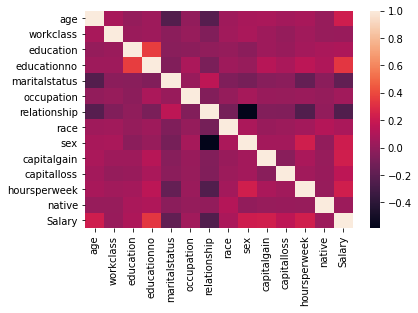

In [31]:
#lets see the relation between dataset
sns.heatmap(df_train.corr())
plt.show()

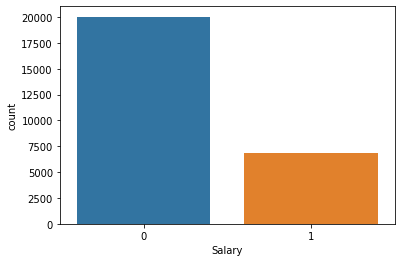

In [32]:
sns.countplot(df_train["Salary"])
plt.show()
#1 means >=50k
#2 means <50k

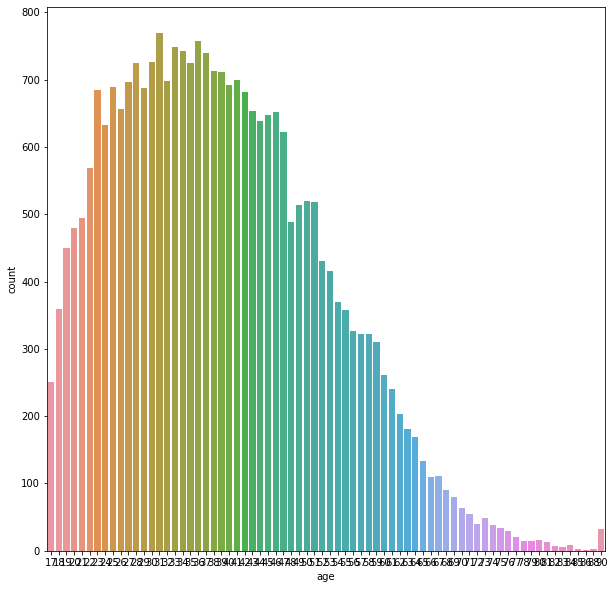

In [33]:
plt.figure(figsize=(10,10))
sns.countplot(df_train["age"])
plt.show()

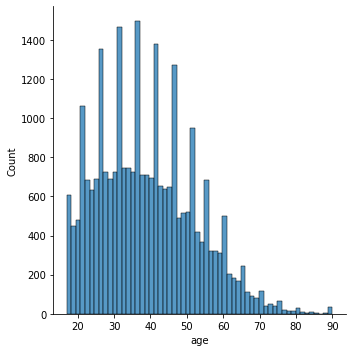

In [34]:
sns.displot(df_train['age'])
plt.show()

# Trian the model with GaussianNB()

In [35]:
# #scale the data 
# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()

# X_train = scaler.fit_transform(X_train)

# X_test = scaler.transform(X_test)

In [36]:
gb_n=GaussianNB()
gb_n.fit(X_train,y_train)

GaussianNB()

In [54]:

y_pred_train = gb_n.predict(X_test)
y_pred_train

array([0, 0, 0, ..., 0, 1, 0])

In [56]:

y_pred_df=pd.DataFrame({'actual_train':y_test, 'predicted_preb':y_pred_train})
y_pred_df

,actual_train,predicted_preb
0,0,0
1,0,0
2,1,0
3,1,1
4,0,0
...,...,...
15055,0,0
15056,0,0
15057,0,0
15058,0,1


# validaiton and accuracy

In [57]:
cm = confusion_matrix(y_test, y_pred_train)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[10796   564]
 [ 2514  1186]]

True Positives(TP) =  10796

True Negatives(TN) =  1186

False Positives(FP) =  564

False Negatives(FN) =  2514


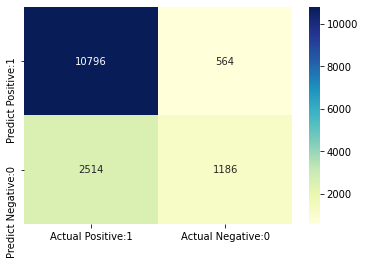

In [64]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.show()

In [59]:
accuracy_score(y_test,y_pred_train)

0.7956175298804781

In [60]:
precision_score(y_test,y_pred_train)

0.6777142857142857

In [49]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     20023
           1       0.69      0.35      0.46      6880

    accuracy                           0.79     26903
   macro avg       0.75      0.65      0.67     26903
weighted avg       0.78      0.79      0.77     26903



# Train with MultinomialNB()

In [42]:
mb_n = MultinomialNB()
mb_n.fit(X_train,y_train)

MultinomialNB()

In [43]:
y_pred_Train_Mb=mb_n.predict(X_train)
y_pred_DF1 = pd.DataFrame({'actual_train': y_train, 'predicted_train':mb_n.predict(X_train)})
y_pred_DF1

,actual_train,predicted_train
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
30154,1,0
30155,0,0
30156,0,0
30158,0,0


In [44]:
confusion_matrix(y_train,mb_n.predict(X_train))

array([[19088,   935],
       [ 5298,  1582]], dtype=int64)

In [45]:
accuracy_score(y_train,mb_n.predict(X_train))

0.7683158012117608

In [46]:
precision_score(y_train,mb_n.predict(X_train))

0.6285260230433055